In [1]:
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean, pstdev, stdev
from typing import Tuple

# Read the data

In [2]:
df = pd.read_excel('is medworld cheating sample data.xlsx',header=None)
sample_values = df.values
sample_values = sample_values.flatten()
sample_values.shape

(50,)

# Problem constants

In [3]:
variance = 12.25
population_std_dev = variance**0.5

# Calculate sample mean and standard deviation

In [4]:
sample_mean = mean(sample_values)
print(f'sample_mean = {sample_mean}mg')

sample_mean = 99.3342mg


# Compute normal distribution with sample mean and standard deviation
By central limit theorem:
1. population mean = sample mean
1. sample standard deviation = population standard deviation/sqrt(number of samples)

Text(0, 0.5, 'probability')

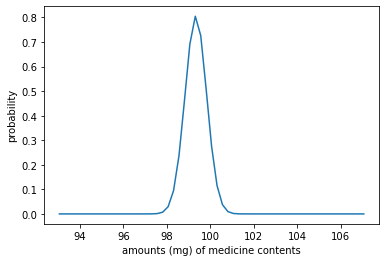

In [5]:
sample_std_dev = population_std_dev/len(sample_values)**0.5
x = np.arange(min(sample_values),max(sample_values),0.25)
y = norm.pdf(x,loc=sample_mean,scale=sample_std_dev)
plt.plot(x,y,'-')
plt.xlabel('amounts (mg) of medicine contents')
plt.ylabel('probability')

# Prepare a confidence interval visualization

In [6]:
def view_confidence_interval(confidence_interval: float,
                             population_std_dev: float,
                             samples: list
                            ) -> Tuple[float,float]:
    '''
    Build and visualize a confidence interval

    Parameters
    ----------
    confidence_interval : float
        The confidence interval to visualize 0.9,0.95 etc.
    population_std_dev : float
        The population standard deviation.
    samples : list or array like
        List of samples to calculate the sample mean and standard deviation.

    Returns
    -------
    x_lower : TYPE
        DESCRIPTION.
    x_higher : TYPE
        DESCRIPTION.

    '''
    # declaring problem constants
    x_bar = mean(samples) # sample mean
    n = len(samples) # number of samples taken
    sigma = population_std_dev # population standard deviation
    sigma_x_bar = sigma/n**0.5 # std dev of sample means
    # generate x and y axes
    x = np.arange(mean(samples)-3*pstdev(samples),mean(samples)+3*pstdev(samples),0.025)
    y = norm.pdf(x,loc=x_bar,scale=sigma_x_bar)
    # get the probabilities of the tail areas
    tail_areas = (1-confidence_interval)/2
    upper_limit_prob = 1-tail_areas
    lower_limit_prob = tail_areas
    
    # compute the value of x_lower and x_higher
    x_lower = norm.ppf(lower_limit_prob,loc=x_bar,scale=sigma_x_bar)
    x_higher = norm.ppf(upper_limit_prob,loc=x_bar,scale=sigma_x_bar)
    
    # plot and shade the graphs
    plt.plot(x,y,'-')
    plt.fill_between(x[x>=x_lower],y[x>=x_lower],color='red')
    plt.fill_between(x[x>=x_higher],y[x>=x_higher],color='white')
    plt.draw()
    return round(x_lower,2), round(x_higher,2)

The mean medicine contents of a sample is expected to lie between 98.52mg and 100.15mg with 90.0% confidence


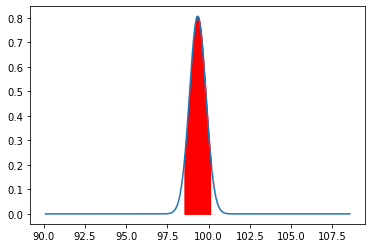

In [7]:
confidence_interval = 0.90
population_std_dev = population_std_dev
x_lower, x_higher = view_confidence_interval(confidence_interval,
                                             population_std_dev,
                                             sample_values
                                            )
print(f'The mean medicine contents of a sample is expected to lie between {x_lower}mg '\
      f'and {x_higher}mg with {confidence_interval*100}% confidence')